In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("./dataset/personalfinance2020-2021.csv")
df1=df[['selftext','num_comments','score','title']]
df1=df1.dropna(subset=['selftext'])
#drop meaningless text
df1=df1[(df1.selftext!='[removed]') & (df1.selftext!='[deleted]')& (df1.selftext!='')& (df1.selftext!='[')]
#drop duplicate
duplicate = df1.duplicated()
print('There are', duplicate.sum(), 'duplicated values.')
df1=df1.drop_duplicates()
len(df1)

There are 16 duplicated values.


23243

In [4]:
import re
def remove_other(x):
    x = re.sub("\$"," ", x) #remove $
    x = re.sub("https*\S+", " ", x) #remove url
    x = re.sub("\n",'', x)#remove newlines
    x = re.sub("\*",'',x)
    return x

df1['selftext']=df1['selftext'].apply(lambda x: remove_other(x))
df1['selftext'].iloc[0]

'Hi guys, A couple of years ago I changed gears on careers, resulting in a salary + results based bonus. However, the bonuses are extremely inconsistent in both frequency and amount. I have a TFSA (roth IRA) that I contribute to regularly with my salary, but am unsure whether to commit a dollar amount or percentage of these bonuses to it. I debate chucking all of it into TFSA, but I also like to celebrate little victories in the moment when I can. Thank you!'

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

#create a list of dictionaries
sia = SIA()
results = []

for line in df1['selftext']:
    pol_score = sia.polarity_scores(line)
    pol_score['selftext'] = line
    results.append(pol_score)

results[:3]

[{'neg': 0.027,
  'neu': 0.713,
  'pos': 0.26,
  'compound': 0.9705,
  'selftext': 'Hi guys, A couple of years ago I changed gears on careers, resulting in a salary + results based bonus. However, the bonuses are extremely inconsistent in both frequency and amount. I have a TFSA (roth IRA) that I contribute to regularly with my salary, but am unsure whether to commit a dollar amount or percentage of these bonuses to it. I debate chucking all of it into TFSA, but I also like to celebrate little victories in the moment when I can. Thank you!'},
 {'neg': 0.054,
  'neu': 0.78,
  'pos': 0.166,
  'compound': 0.9782,
  'selftext': 'I read that it doesn\'t really hurt my credit score. I opened a checking account from one mega bank but their online service hasn\'t been so great, it may just be because I\'m still under 60 days. It was still frustrating to deal with them. So I thought of opening another one from a CU, I would like to use that as my main checking account combo\'d with a savings ac

In [46]:
sent = pd.DataFrame(results)
sent


,neg,neu,pos,compound,selftext
0,0.027,0.713,0.260,0.9705,"Hi guys, A couple of years ago I changed gears..."
1,0.054,0.780,0.166,0.9782,I read that it doesn't really hurt my credit s...
2,0.000,0.893,0.107,0.5933,I just opened a Roth IRA and want to max out m...
3,0.000,0.980,0.020,0.0258,"Hello, I have a quick question about how billi..."
4,0.078,0.909,0.013,-0.7203,In 2020: I was employed Jan-Jul with a low ded...
...,...,...,...,...,...
23238,0.027,0.903,0.069,0.6212,"After many years with Quicken, they have shift..."
23239,0.085,0.878,0.037,-0.5411,Hello!I have an old 401K account that has a go...
23240,0.000,1.000,0.000,0.0000,I’ve been learning about Roth IRA’s and invest...
23241,0.034,0.852,0.114,0.9965,Long time reader here and first time home buye...


In [47]:
sent['total']=(sent['pos']-sent['neg'])/sent['neu']
sent['total']

0        0.326788
1        0.143590
2        0.119821
3        0.020408
4       -0.071507
           ...   
23238    0.046512
23239   -0.054670
23240    0.000000
23241    0.093897
23242    0.059908
Name: total, Length: 23243, dtype: float64

(array([1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 6.000e+00, 6.000e+00,
        1.300e+01, 1.300e+01, 2.200e+01, 3.500e+01, 6.700e+01, 1.550e+02,
        2.540e+02, 5.530e+02, 1.008e+03, 1.993e+03, 3.349e+03, 3.956e+03,
        3.679e+03, 2.960e+03, 1.889e+03, 1.166e+03, 7.040e+02, 4.690e+02,
        3.260e+02, 1.780e+02, 1.240e+02, 7.100e+01, 7.300e+01, 3.800e+01,
        2.400e+01, 1.600e+01, 1.600e+01, 1.000e+01, 7.000e+00, 4.000e+00,
        9.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 6.000e+00]),
 array([-0.82149362, -0.78506375, -0.74863388, -0.71220401, -0.67577413,
        -0.63934426, -0.60291439, -0.56648452, -0.53005464, -0.49362477,
        -0.4571949 , -0.42076503, -0.38433515, -0.34790528, -0.31147541,
        -0.27504554, -0.23861566, -0.20218579, -0.16575592, -0.12932605,
        -0.09289617, -0.0564663 , -0.02003643,  0.01639344,  0.05282332,
         0.

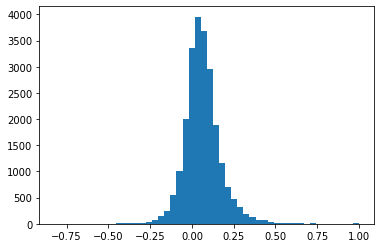

In [77]:
plt.hist(sent['total'][(sent['total']<=1)&(sent['total']>=-1)],bins=50)

(array([1.000e+00, 3.000e+00, 1.000e+00, 5.000e+00, 1.000e+01, 2.200e+01,
        5.600e+01, 2.350e+02, 1.031e+03, 4.900e+03]),
 array([-0.82149362, -0.73934426, -0.6571949 , -0.57504554, -0.49289617,
        -0.41074681, -0.32859745, -0.24644809, -0.16429872, -0.08214936,
         0.        ]),
 <BarContainer object of 10 artists>)

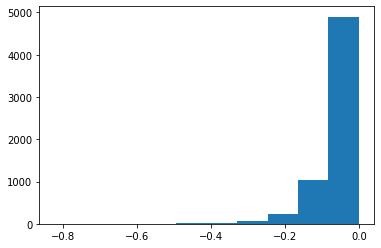